# Laptop Prices
## by Amira ElShora

## Preliminary Wrangling

> Dataset about prices of 1300 Laptop models, you can find it here: https://www.kaggle.com/ionaskel/laptop-prices

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
laptops = pd.read_csv('laptops.csv')
laptops.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#dropping "Unnamed: 0" column
laptops.drop('Unnamed: 0', axis=1, inplace=True)
#dropping duplicates 
laptops = laptops.drop_duplicates()

In [4]:
laptops.shape

(1275, 12)

In [5]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 79.7+ KB


In [6]:
laptops.describe()

,Inches,Price_euros
count,1275.000000,1275.000000
mean,15.022902,1134.969059
std,1.429470,700.752504
min,10.100000,174.000000
25%,14.000000,609.000000
50%,15.600000,989.000000
75%,15.600000,1496.500000
max,18.400000,6099.000000


#### 3 modifications to the dataset's variable types/structure before exploration

##### 1. Modify the "Weight" column

In [7]:
#remove 'kg' by replacing it with empty then change its data type to int 
laptops['Weight'] = [sub.replace("kg", "").strip() for sub in laptops['Weight']]
laptops['Weight'] = pd.to_numeric(laptops['Weight'])
laptops['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1270    1.80
1271    1.30
1272    1.50
1273    2.19
1274    2.20
Name: Weight, Length: 1275, dtype: float64

##### 2. Generate new column from "Gpu" Column

In [8]:
#extract GPU company producer name from "Gpu" column and add it to new column "Gpu_Brand"
laptops['Gpu_Brand'] = laptops['Gpu'].str.split(' ').str[0]
laptops['Gpu_Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1270    Intel
1271    Intel
1272    Intel
1273      AMD
1274    Intel
Name: Gpu_Brand, Length: 1275, dtype: object

##### 3. Generate new column from "Cpu" Column

In [9]:
#extract CPU type from "Cpu" column and add it to new column "Cpu_Type"
laptops['Cpu_Type'] = (laptops['Cpu'].str.split(' ').str[0] + " " + laptops['Cpu'].str.split(' ').str[1])
laptops['Cpu_Type']

0          Intel Core
1          Intel Core
2          Intel Core
3          Intel Core
4          Intel Core
            ...      
1270       Intel Core
1271       Intel Core
1272    Intel Celeron
1273       Intel Core
1274    Intel Celeron
Name: Cpu_Type, Length: 1275, dtype: object

#### Re-check dataset properties (Shape, info, descriptive stats)

In [10]:
laptops.shape

(1275, 14)

In [11]:
laptops.info(),
laptops.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float64
 11  Price_euros       1275 non-null   float64
 12  Gpu_Brand         1275 non-null   object 
 13  Cpu_Type          1275 non-null   object 
dtypes: float64(3), object(11)
memory usage: 94.6+ KB


,Inches,Weight,Price_euros
count,1275.000000,1275.000000,1275.000000
mean,15.022902,2.040525,1134.969059
std,1.429470,0.669196,700.752504
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,609.000000
50%,15.600000,2.040000,989.000000
75%,15.600000,2.310000,1496.500000
max,18.400000,4.700000,6099.000000


In [12]:
laptops['Ram'].value_counts()

8GB     613
4GB     367
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: Ram, dtype: int64

### What is the structure of your dataset?

There are 1275 laptops with 12 features (Company, Product, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price_euros). Most variables are in categorical/qaulitative nominal nature but the column "Ram" is ordered as follows:<br>
&emsp; Lowest ---> Highest: 2GB, 4GB, 6GB, 8GB, 12GB, 16GB, 24GB, 32GB, 64GB 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the laptops in the dataset. <br>
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Mainly CPU and RAM have the strongest effect on a laptops's price. In addition to them I'll consider GPU, Inches, Weight and Type though they have less effect than the main ones.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Price.

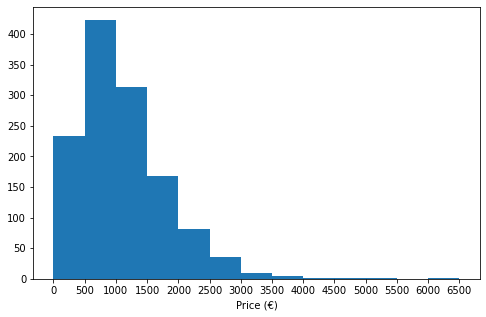

In [13]:
binsize = 500
bins = np.arange(0, laptops['Price_euros'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = laptops, x='Price_euros', bins = bins);
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500])
plt.xlabel('Price (€)');

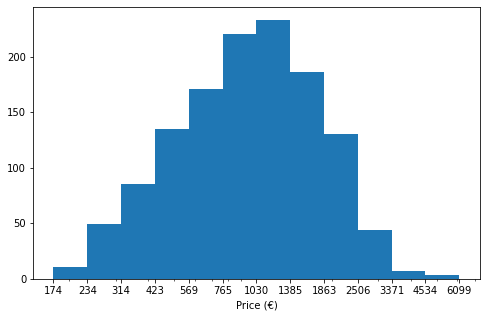

In [14]:
#there's a long tail in the distribution, so let's put it on a log scale instead
bins = np.logspace(np.log10(laptops['Price_euros'].min()),np.log10(laptops['Price_euros'].max()), 13)
plt.figure(figsize=[8, 5])
plt.hist(data = laptops, x = 'Price_euros', bins = bins)
plt.xscale('log')
plt.xticks(list(bins), [int(num) for num in list(bins)])
plt.xlabel('Price (€)')
plt.show()

> Price has a long tailed distribution with a lot of laptops on the low price end and few on the high price end. When transformed and plotted on a log scale, the price distribution looks unimodal and somehow normally distributed, with peak right at 1K.

Now let's explore the predicting variables: <br>
1. RAM & CPU

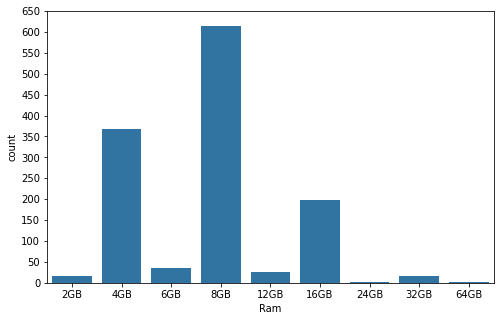

In [15]:
#plot for RAM
plt.figure(figsize=[8, 5])
#setting the color
default_color = sb.color_palette()[0]
#ordered from lowest to highest/best so we can order the x-axis ticks
ram_orders = ['2GB', '4GB', '6GB', '8GB', '12GB', '16GB', '24GB', '32GB', '64GB']
sb.countplot(data=laptops, x='Ram', color=default_color, order=ram_orders)

ram_counts = laptops['Ram'].value_counts().values
plt.yticks(np.arange(0, ram_counts.max()+50, 50));

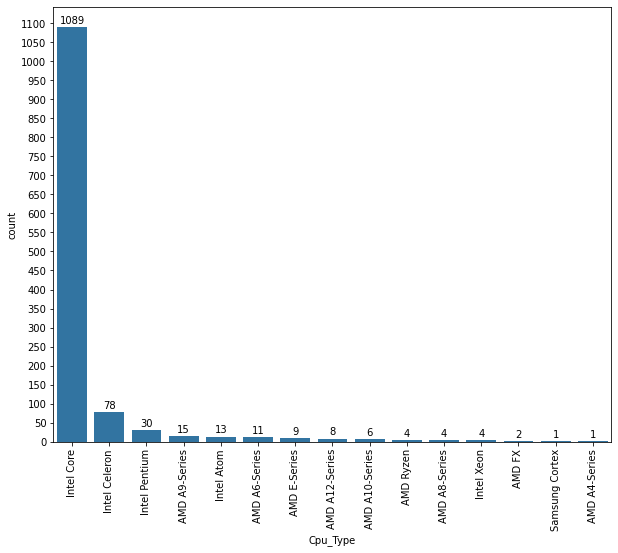

In [16]:
#plot for CPU
plt.figure(figsize=[10, 8])

cpu_counts = laptops['Cpu_Type'].value_counts()
cpu_order = cpu_counts.index

sb.countplot(data=laptops, x='Cpu_Type', color=default_color, order=cpu_order);
plt.yticks(np.arange(0, cpu_counts.values.max()+50, 50));
plt.xticks(rotation=90);

#Logic to print the count text on the bars
for i in range (cpu_counts.shape[0]):
    count = cpu_counts[i]
    plt.text(i, count+10, str(count), ha="center")

> Most of the laptops fall into the categories of 4G, 8GB and 16GB with top count of laptops having 8GB Ram <br>
Most of the laptops have intel core processor and very few are of the other CPU types.

Due to the rare existence of most CPU types I'll consider any CPU type with count < 10 an outlier and so it will get removed (Consider top 6 types)

In [17]:
#Dropping outliers
#laptops_copy
laptops_copy = laptops

In [18]:
li_drop = ['AMD E-Series', 'AMD A12-Series', 'AMD A10-Series', 'AMD Ryzen', 'Intel Xeon', 'AMD A8-Series', 'AMD FX', 'Samsung Cortex', 'AMD A4-Series']
laptops_copy = laptops_copy[~laptops_copy['Cpu_Type'].isin(li_drop)]
laptops_copy.reset_index(drop=True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Gpu_Brand,Cpu_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,Intel Core
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,Intel Core
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Intel,Intel Core
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,AMD,Intel Core
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,Intel Core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,Intel,Intel Core
1232,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,Intel,Intel Core
1233,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,Intel,Intel Celeron
1234,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,AMD,Intel Core


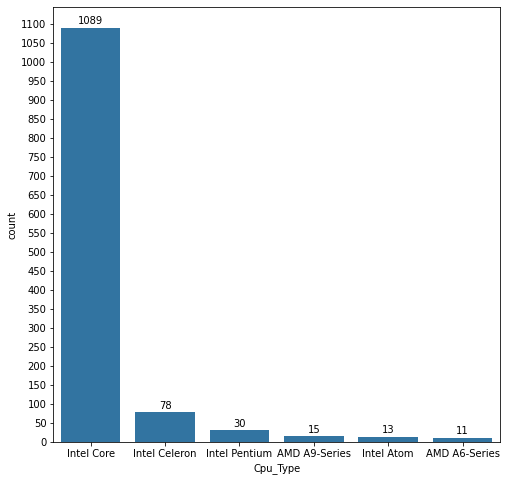

In [19]:
#plot for CPU again
plt.figure(figsize=[8, 8])

cpu_counts = laptops_copy['Cpu_Type'].value_counts()
cpu_order = cpu_counts.index

sb.countplot(data=laptops_copy, x='Cpu_Type', color=default_color, order=cpu_order);
plt.yticks(np.arange(0, cpu_counts.values.max()+50, 50));

#Logic to print the count text on the bars
for i in range (cpu_counts.shape[0]):
    count = cpu_counts[i]
    plt.text(i, count+10, str(count), ha="center")

2. GPU & Type

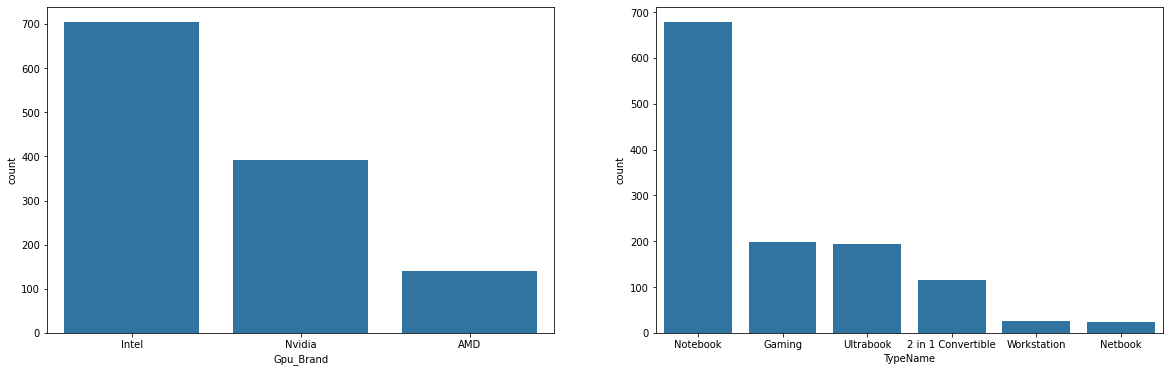

In [20]:
#plot for GPU & Type
fig, ax = plt.subplots(ncols=2, figsize = [20,6])

gpu_counts = laptops_copy['Gpu_Brand'].value_counts()
type_counts = laptops_copy['TypeName'].value_counts()

#GPU
sb.countplot(data=laptops_copy, x='Gpu_Brand', color=default_color, ax=ax[0], order = gpu_counts.index);
    
#Type
sb.countplot(data=laptops_copy, x='TypeName', color=default_color, ax=ax[1], order = type_counts.index);

> The GPU of the laptops mostly by Intel whereas in the type the Notebook type is the leading one followed by gaming and Ultrabook which are of equal presence.

3. Size & Weight

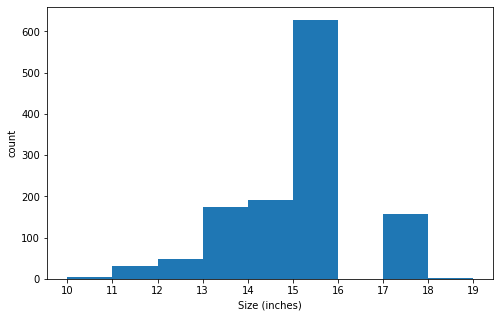

In [21]:
#Plot for size
binsize = 1
bins = np.arange(10, laptops_copy['Inches'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = laptops_copy, x='Inches', bins=bins);
plt.xlabel('Size (inches)');
plt.ylabel('count')
plt.xticks([10,11,12,13,14,15,16,17,18,19]);

> Most laptops seem to have size between 15 to 15.9 inches. <br>
Very few have the size of 10 to 10.9 and 18 to 18.9 inches. <br>
Zero laptops have a size of 16.0 - 16.9 inches.

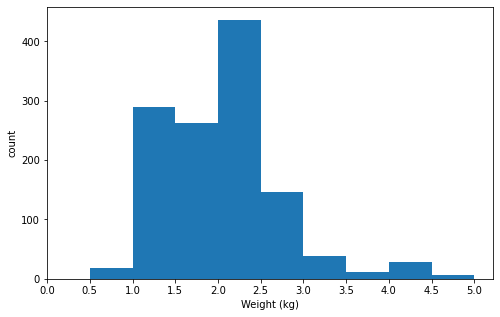

In [22]:
#Plot for weight
binsize = 0.5
bins = np.arange(binsize, laptops_copy['Weight'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = laptops_copy, x='Weight', bins=bins);
plt.xlabel('Weight (kg)');
plt.ylabel('count');
plt.xticks([0, 0.5, 1,1.5,2,2.5,3,3.5,4,4.5,5]);

> Most laptops have a weight of 2 - 2.4 kg. <br>
In the 2nd place comes laptops that weights 1.0 - 1.9 kg. <br>
Very few have weight of 0.5 - 0.9 and 3.5 to 4.9 kg.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable had a long tail to the right, so I looked at the data using a log transformation. Under the transformation, the data looked unimodal, with peak right at 1K.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Cpu_Type variable, a number of outlier were identified, all of these points were removed from the dataset.

## Bivariate Exploration

To start off with, I want to look at the relation between my main predictors (RAM & CPU) and Variable of Interest(Price)

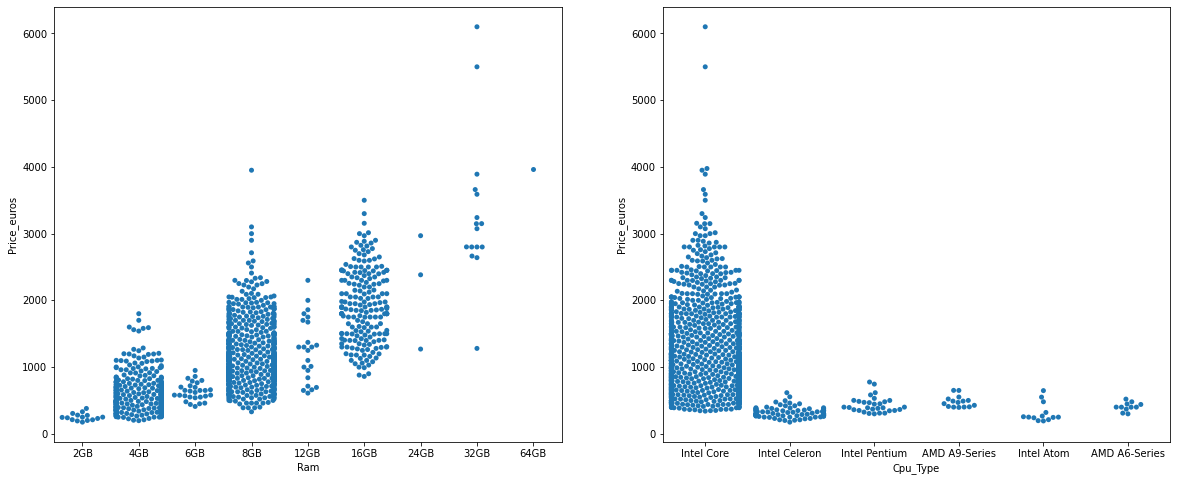

In [23]:
#plot for ram vs price
fig, ax = plt.subplots(1,2, figsize = (20,8))
ram_orders = ['2GB', '4GB', '6GB', '8GB', '12GB', '16GB', '24GB', '32GB', '64GB']
sb.swarmplot(data = laptops_copy, x = 'Ram', y = 'Price_euros', color = default_color, order=ram_orders, ax=ax[0]);

#plot for cpu_type vs price
cpu_order = laptops_copy['Cpu_Type'].value_counts().index
sb.swarmplot(data = laptops_copy, x = 'Cpu_Type', y = 'Price_euros', color = default_color, order = cpu_order, ax=ax[1]);

> The Ram VS Price plot: <br>
&emsp; &emsp; Most expensive laptops are those with 64GB RAM <br>
&emsp; &emsp; Laptops with 8GB are the most common as well as with average price <br>
&emsp; &emsp; Laptops with 2GB are the cheapest of them all <br>
The CPU Type VS Price plot: <br>
&emsp; &emsp; Most expensive laptops are those with Inter Core processor <br>
&emsp; &emsp; Laptops with other processor types are almost equal in price <br>

Secondly, I want to look at the relation between my other categorical predictors (Type, GPU) and price

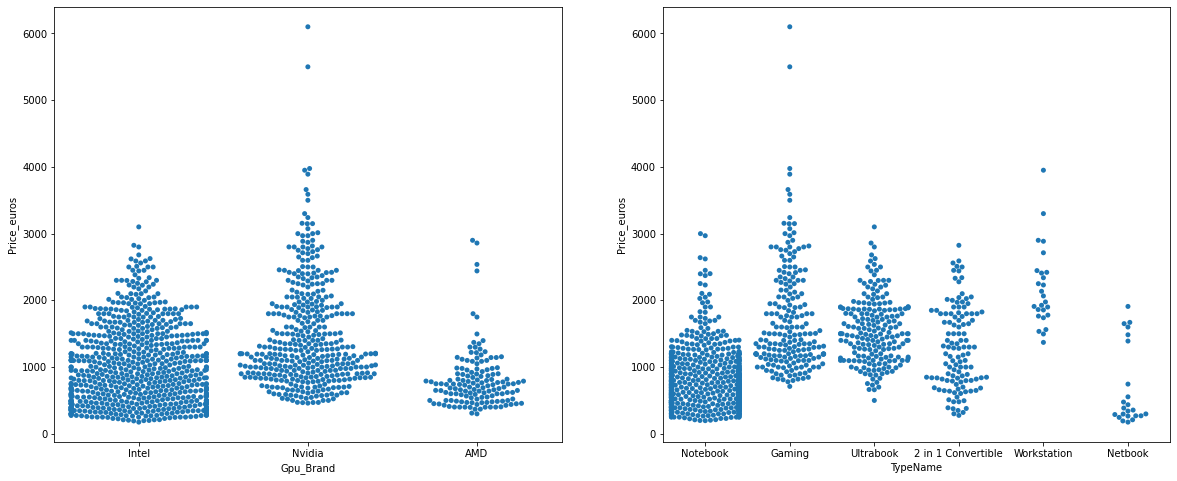

In [24]:
#plot for Gpu_Brand vs price
fig, ax = plt.subplots(1,2, figsize = (20,8))
gpu_order = laptops_copy['Gpu_Brand'].value_counts().index
sb.swarmplot(data = laptops_copy, x = 'Gpu_Brand', y = 'Price_euros', color = default_color, order=gpu_order, ax=ax[0]);

#plot for TypeName vs price
type_order = laptops_copy['TypeName'].value_counts().index
sb.swarmplot(data = laptops_copy, x = 'TypeName', y = 'Price_euros', color = default_color, order = type_order, ax=ax[1]);

> The GPU Brands VS Price plot: <br>
&emsp; &emsp; The 3 of them are almost in the same price range yet Nividia and Intel have some more expensive impact on laptops than AMD <br>
The Type Type VS Price plot: <br>
&emsp; &emsp; Gaming, Workstation and Ultrabook laptops are recording higher prices than other laptop types <br>
&emsp; &emsp; Notebook laptops are the most common as well as at average price <br>

Thirdly, I want to have a closer look at the correlations between the numeric variables in the dataset (Inches, Weight, Price)

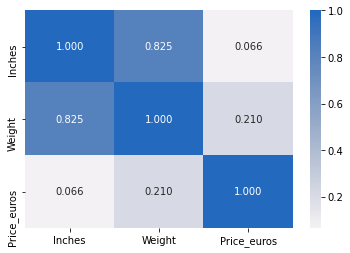

In [25]:
#correlation plot
plt.figure(figsize = [6, 4])
sb.heatmap(laptops_copy.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> Weight & Inches seem to have a very weak correlation with our variable of interest (Price) <br>
For that we will not consider them as predictors of price on there own but we can use them as extra dimension later in our visuals. <br> <br>
On the other hand  Weight & Inches are highly correlated with each other as expected (increase in laptop size increases its weight by nature).

Laslty, I want to look at the relation between all my predictors catigorical and numerical by a grid plot

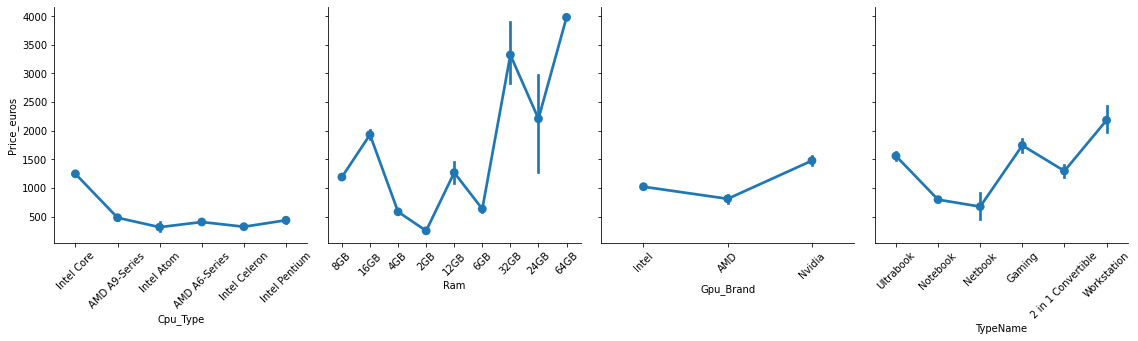

In [26]:
g = sb.PairGrid(laptops_copy, y_vars="Price_euros",
                 x_vars=["Cpu_Type", "Ram", "Gpu_Brand", "TypeName"], height=4, aspect=1)
g.map(sb.pointplot, color=default_color);
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

> Predictors VS. Predicted (Price) <br>
We can tell from the grid plot above that all predictor vars record a price range of hundreds to 2000, On the other hand the RAM curve is rising dramatically to price ranges up to 4000, For that we can say that RAM is a very influential factor in setting price for a laptop. (The larger the RAM size the more expensive the laptop is) <br> <br>
Note to instructor: I couldn't arrange second plot in order of ram size, if you have any source that can help me do it please pass it to me

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Ram: <br>
&emsp;&emsp; Most expensive laptops are those with 64GB RAM <br>
&emsp;&emsp;  Laptops with 8GB are the most common as well as with average price <br>
&emsp;&emsp; Laptops with 2GB are the cheapest of them all <br>
CPU Type: <br>
&emsp;&emsp; Most expensive laptops are those with Inter Core processor <br>
&emsp;&emsp; Laptops with other processor types are almost equal in price <br>
The GPU Brands: <br>
&emsp;&emsp; The 3 of them are almost in the same price range yet Nividia and Intel have some more expensive impact on laptops than AMD<br>

All price predictor vars record a price range of hundreds to 2000, On the other hand the RAM curve is rising dramatically to price ranges up to 4000, For that we can conclude that RAM is a very influential factor in setting price for a laptop. (The larger the RAM size the more expensive the laptop is)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Weight & Inches seem to have a very weak correlation with our variable of interest (Price)
For that we will not consider them as predictors of price on there own but we can use them as extra dimension later in our visuals. <br>
On the other hand Weight & Inches are highly correlated with each other as expected (increase in laptop size increases its weight by nature).

## Multivariate Exploration

The main thing I want to explore is how the 2 main predictors relate to price

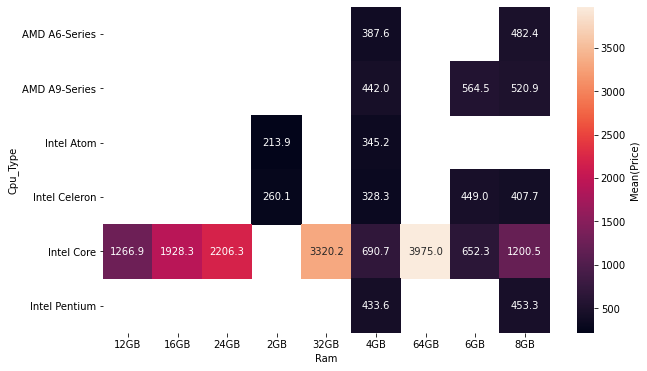

In [27]:
#heatmap
plt.figure(figsize = [10, 6])
cat_means = laptops_copy.groupby(['Ram', 'Cpu_Type']).mean()['Price_euros']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Cpu_Type', columns = 'Ram',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'Mean(Price)'});

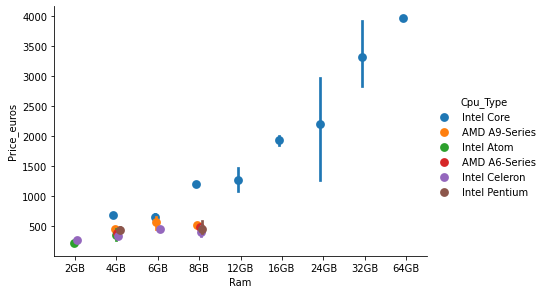

In [28]:
#point plot
g = sb.catplot(x="Ram", y="Price_euros",
                hue="Cpu_Type",
                data=laptops_copy, kind="point",
               order = ram_orders,
                dodge=True,
               linestyles = '',
                height=4, aspect=1.5);

> The most expensive Laptop is one with CPU of Type Inel Core and 64GB RAM <br>
The cheapest laptops are those with CPU of the other types with RAM size of 2 - 8 GB

Secondly, I want to eplore the effect of adding GPU Brand to the relation above

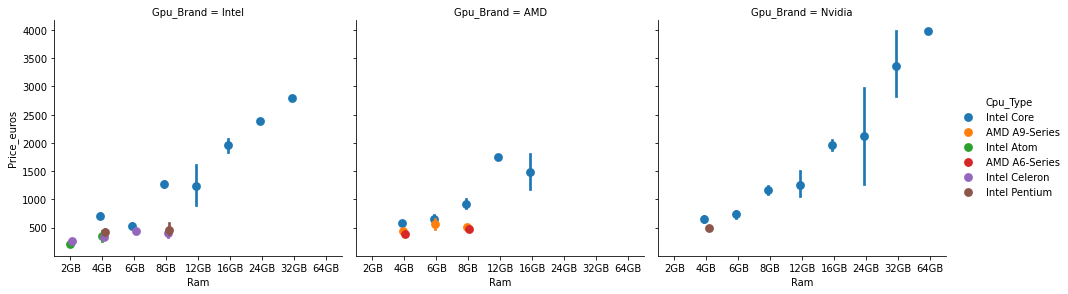

In [29]:
#adding GPU
g = sb.catplot(x="Ram", y="Price_euros",
                hue="Cpu_Type", col="Gpu_Brand",
                data=laptops_copy, kind="point",
               order = ram_orders,
                dodge=True,
               linestyles = '',
                height=4, aspect=1.1);

> Nivida GPU comes with Intel processor almost in all cases <br>
The most expensive Laptop is one with CPU of Type Inel Core, 64GB RAM and GPU Brand Nividia <br>
The cheapest laptops are those with CPU of the other types with RAM size of 2 - 8 GB and GPU Brand AMD

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The processor along with RAM size and GPU type relate linearly <br>

### Were there any interesting or surprising interactions between features?

No